# Logistic regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn import datasets

data = datasets.load_breast_cancer()
breast_cancer = pd.DataFrame(data.data, columns=data.feature_names)

breast_cancer = breast_cancer.loc[:, ["mean radius", "mean compactness"]]

display(breast_cancer)

,mean radius,mean compactness
0,17.99,0.27760
1,20.57,0.07864
2,19.69,0.15990
3,11.42,0.28390
4,20.29,0.13280
...,...,...
564,21.56,0.11590
565,20.13,0.10340
566,16.60,0.10230
567,20.60,0.27700


The accuracy of the model is 0.9015817223198594


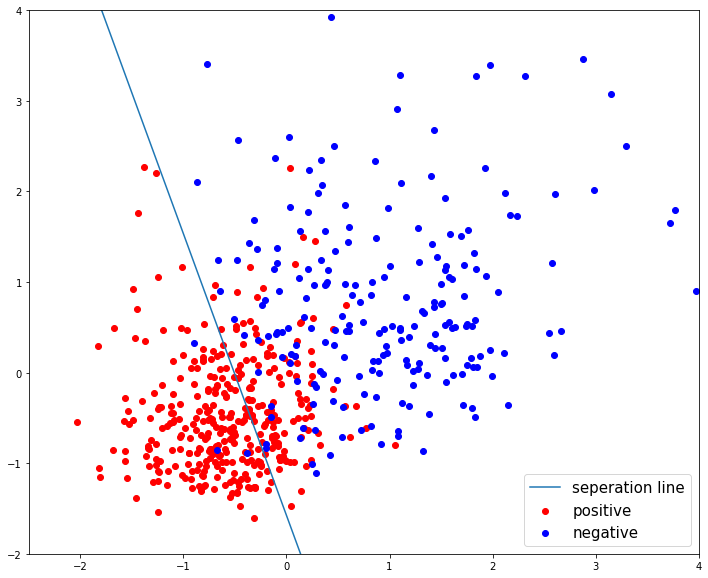

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

breast_cancer_std = StandardScaler().fit_transform(breast_cancer)

model = LogisticRegression().fit(breast_cancer_std, data.target)
print(f"The accuracy of the model is {model.score(breast_cancer_std, data.target)}")

plt.figure(figsize=(12, 10))
plt.xlim(-2.5, 4)
plt.ylim(-2, 4)


plt.scatter(breast_cancer_std[data.target == 1, 0], 
            breast_cancer_std[data.target == 1, 1], 
            c="red", label="positive")

plt.scatter(breast_cancer_std[data.target == 0, 0], 
            breast_cancer_std[data.target == 0, 1], 
            c="blue", label="negative")

x = np.arange(-2, 5)
plt.plot(x, x * model.coef_[0][0] + model.coef_[0][1], 
         label="seperation line")

plt.legend(prop={"size": 15})

In [ ]:
result = zip(model.predict(breast_cancer_std[20:25]),
          model.predict_proba(breast_cancer_std[20:25])[:, 1])

for count, (class_, prob) in enumerate(result):
    print(f"The correponding probability for label {class_} of {count}th object is {prob}.\n")

The correponding probability for label 1 of 0th object is 0.7246190930101648.

The correponding probability for label 1 of 1th object is 0.9974729565670527.

The correponding probability for label 0 of 2th object is 0.026303453790521614.

The correponding probability for label 0 of 3th object is 0.004397432135645482.

The correponding probability for label 0 of 4th object is 0.0605503698769022.



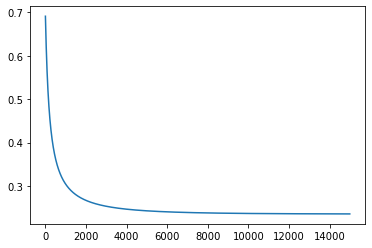

In [ ]:
plt.plot(np.arange(len(loss)), loss)